## ARISE-GERI data analysis


### Background
ARISE-GERI data
<br> 
Tabulates trials (assessment and intervention trials) of ONE patient. 


*import libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import datetime 
import os
import glob
import chime
%load_ext chime

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import data
patientid = 'P08'
progress = pd.read_csv('result_P08.csv', sep='\t+', header=None)

In [4]:
# identify dir where results will be saved
results_path = os.path.join('data', 'results', patientid)
if not os.path.exists(results_path):
    os.makedirs(results_path)

In [5]:
progress.columns=['mean_speed', 'error_rate', 'collision_rate']
progress

,mean_speed,error_rate,collision_rate
0,0.007375,0.060241,1.277108
1,0.011761,0.040541,0.500000
2,0.009670,0.075342,1.041096
3,0.011118,0.042254,0.676056
4,0.011613,0.006944,0.625000
5,0.013540,0.020979,0.391608


In [6]:
# def check_inf(row):
#     if row['speed/errors'] == np.inf:
#         row['speed/errors'] = row['mean_speed']
#     return row

In [7]:
# progress = progress.apply(check_inf,axis=1)

### plot ALL trials

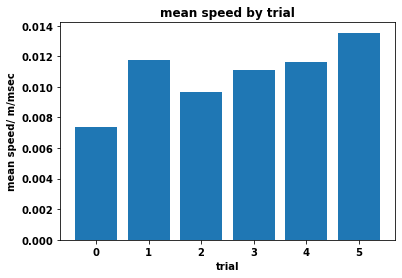

In [8]:
plt.bar(progress.index,height=progress['mean_speed']);
# plt.plot(progress['mean_svc_errors']);
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel('trial')
plt.ylabel('mean speed/ m/msec');
plt.title('mean speed by trial');

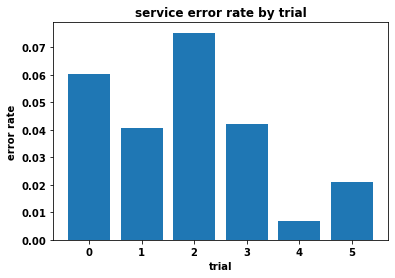

In [9]:
plt.bar(progress.index,height=progress['error_rate']);
plt.xlabel('trial')
plt.ylabel('error rate');
plt.title('service error rate by trial');

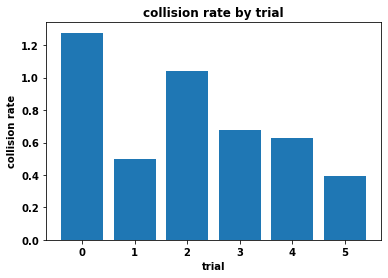

In [10]:
plt.bar(progress.index,height=progress['collision_rate']);
plt.xlabel('trial')
plt.ylabel('collision rate');
plt.title('collision rate by trial');

In [11]:
class StopExecution(Exception):
    def _render_traceback_(self):
        pass
    
if patientid == 'P11':
    chime.error()
    print('P11 has no assess_2 trial')
    raise StopExecution

### plot only trials (not assess)

In [12]:
temp = progress.iloc[2:].reset_index().drop(columns=['index'])
temp.index = np.arange(1, len(temp)+1)
temp

,mean_speed,error_rate,collision_rate
1,0.009670,0.075342,1.041096
2,0.011118,0.042254,0.676056
3,0.011613,0.006944,0.625000
4,0.013540,0.020979,0.391608


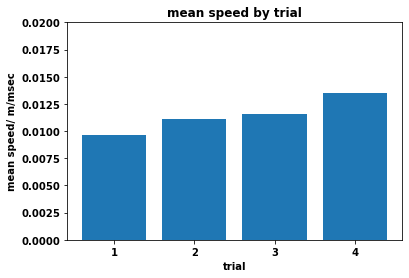

In [13]:
temp = progress.iloc[2:].reset_index().drop(columns=['index'])
temp.index = np.arange(1, len(temp)+1)
plt.bar(temp.index,height=temp['mean_speed']);
plt.xlabel('trial')
plt.ylabel('mean speed/ m/msec');
plt.ylim([0, 0.02])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('mean speed by trial');
plt.savefig(results_path + '\mean_speed.png',bbox_inches = "tight")
plt.show()

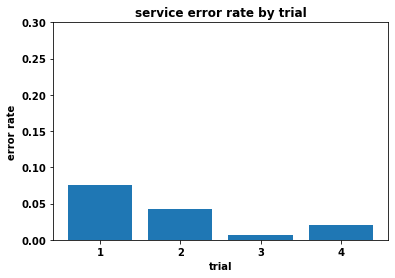

In [14]:
temp = progress.iloc[2:].reset_index().drop(columns=['index'])
temp.index = np.arange(1, len(temp)+1)
plt.bar(temp.index,height=temp['error_rate']);
plt.xlabel('trial')
# labels = ['1','2','3','4']
# plt.xticks(temp.index, labels)
plt.ylabel('error rate');
plt.ylim([0, 0.3])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('service error rate by trial');
plt.savefig(results_path + '\error_rate.png')
plt.show()

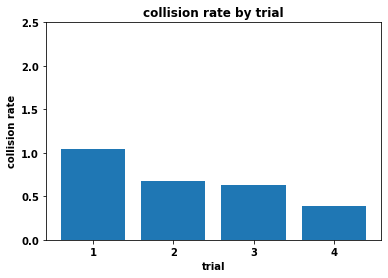

In [15]:
temp = progress.iloc[2:].reset_index().drop(columns=['index'])
temp.index = np.arange(1, len(temp)+1)
plt.bar(temp.index,height=temp['collision_rate']);
plt.xlabel('trial')
plt.ylabel('collision rate');
plt.ylim([0, 2.5])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('collision rate by trial');
plt.savefig(results_path + '\collision_rate.png')
plt.show()

### plot only assessment trials

In [16]:
assess = progress.iloc[0:2].reset_index().drop(columns=['index'])
assess.index = np.arange(1, len(assess)+1)
assess

,mean_speed,error_rate,collision_rate
1,0.007375,0.060241,1.277108
2,0.011761,0.040541,0.500000


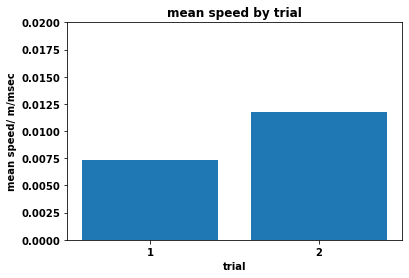

In [17]:
assess = progress.iloc[0:2].reset_index().drop(columns=['index'])
assess.index = np.arange(1, len(assess)+1)
plt.bar(assess.index,height=assess['mean_speed']);
plt.xlabel('trial')
plt.ylabel('mean speed/ m/msec');
plt.ylim([0, 0.02])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('mean speed by trial');
plt.savefig(results_path + '\\assess_mean_speed.png',bbox_inches = "tight")
plt.show()

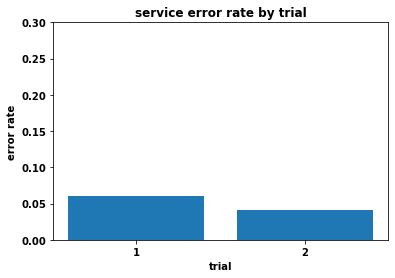

In [18]:
assess = progress.iloc[0:2].reset_index().drop(columns=['index'])
assess.index = np.arange(1, len(assess)+1)
plt.bar(assess.index,height=assess['error_rate']);
plt.xlabel('trial')
# labels = ['1','2','3','4']
# plt.xticks(temp.index, labels)
plt.ylabel('error rate');
plt.ylim([0, 0.3])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('service error rate by trial');
plt.savefig(results_path + '\\assess_error_rate.png')
plt.show()

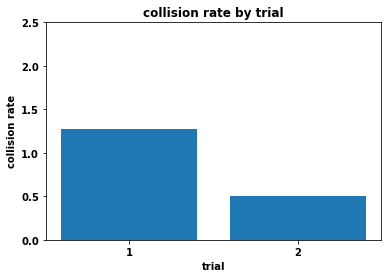

In [19]:
assess = progress.iloc[0:2].reset_index().drop(columns=['index'])
assess.index = np.arange(1, len(assess)+1)
plt.bar(assess.index,height=assess['collision_rate']);
plt.xlabel('trial')
plt.ylabel('collision rate');
plt.ylim([0, 2.5])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('collision rate by trial');
plt.savefig(results_path + '\\assess_collision_rate.png')
plt.show()

In [20]:
%chime